# 定义
具身智能(Embodied AI)：有身体并支持物理交互的智能体，如家用服务机器人、无人车等。 —— “身体力行”
Embodied AI is AI that controls a physical “thing,” like a robot arm or an autonomous vehicle.

1950年，图灵在他的论文 ——《Computing Machinery and Intelligence》中首次提出了具身智能的概念。在之后的几十年里，大家都觉得这是一个很重要的概念，但具身智能并没有取得很大的进展，因为当时的技术还不足以支撑其发展。
> We may hope that machines will eventually compete with men in all purely intellectual fields. But which are the best ones to start with? Even this is a difficult decision. Many people think that a very abstract activity, like the playing of chess, would be best. It can also be maintained that it is best to provide the machine with the best sense organs that money can buy, and then teach it to understand and speak English. This process could follow the normal teaching of a child. Things would be pointed out and named, etc. Again I do not know what the right answer is, but I think both approaches should be tried. ——Alan Turing

上面图灵所说的下围棋和使机器具备感官、能说英语、能学习就分别代表了非具身智能和具身智能，而两种智能形态的此消彼长也贯穿了人工智能研究这跌宕起伏的七十年。

李飞飞：“具身的含义不是身体本身，而是与环境交互以及在环境中做事的整体需求和功能。”
refer to: https://zhuanlan.zhihu.com/p/620342675

具身智能（Embodied Intelligence）指的是机器人或智能体通过感知、理解和交互来适应环境，并执行任务的能力。与传统的基于规则或符号的人工智能不同，具身智能强调将感知和行动相结合，使智能体能够更好地理解其周围的环境和与环境的互动。(https://zhuanlan.zhihu.com/p/669226987)

# High-Level & Low-Level
关于机器人控制层级有很多种分法，为方便理解大模型论文和机器人的结合点，在本文中将控制层级分为5级：

1. 任务级Task Level：我咖啡洒了，你能帮忙吗；
2. 技能级Skill Level：找到抹布、捡起抹布、移动抹布、放下抹布；
3. 动作级Motion Level：直线运动、圆弧运动、样条曲线运动、手抓开合；
4. 基元级Primitive Level：根据动作和机器人物理限制进行轨迹规划完毕之后插值生成的控制指令，包括目标位置、姿态、速度前馈、力矩前馈，一般周期要做到至少500Hz，常见的控制周期现在已经做到1000Hz以上。如果是力控制，这周期一般回到2000~4000hz;
5. 伺服级Servo Level：运行在伺服驱动器里的位置速度电流三环控制；

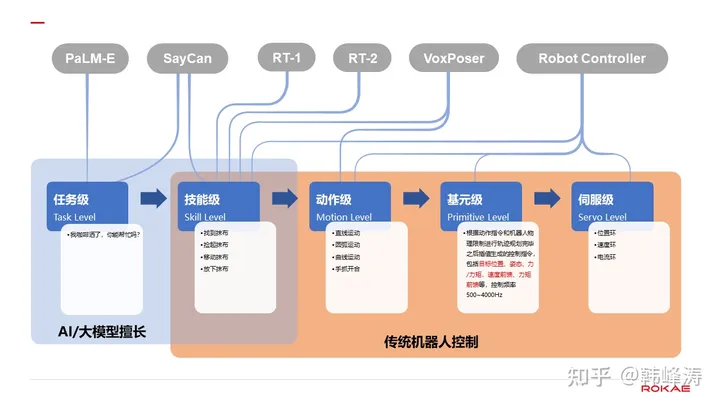

# 论文

| Paper | Github | Jupyter | Website | Labels | Cited |
| :- | :-: | :-: | :-: | :- | :-: |
| **Review** |
| [Toward General-Purpose Robots via Foundation Models: A Survey and Meta-Analysis](https://arxiv.org/abs/2312.08782) | [github](https://github.com/JeffreyYH/robotics-fm-survey) | [notebook](Toward_general_purpose_robots_via_foundation_models_A_survey_and_meta_analysis.ipynb) | [website](https://robotics-fm-survey.github.io/) | [面向通用机器人的基础模型：综述和综合分析](https://zhuanlan.zhihu.com/p/672534947) | 12
| [Real-World Robot Applications of Foundation Models: A Review](https://arxiv.org/abs/2402.05741) | | [notebook](Real_World_Robot_Applications_of_Foundation_Models_A_Review.ipynb) | | | 6
| [Language-conditioned Learning for Robotic Manipulation: A Survey](https://arxiv.org/abs/2312.10807) | [github](https://github.com/hk-zh/language-conditioned-robot-manipulation-models) | todo | | | 2
| [What Foundation Models can Bring for Robot Learning in Manipulation : A Survey](https://arxiv.org/abs/2404.18201) | | todo | | | 0
| [The Rise and Potential of Large Language Model Based Agents: A Survey](https://arxiv.org/abs/2309.07864) | [LLM-Agent](https://github.com/WooooDyy/LLM-Agent-Paper-List) | | | | 279
| [Large Language Models for Robotics: A Survey](https://arxiv.org/abs/2311.07226) | | | | review: 1) 概述机器人LLMs的背景和发展, 然后描述机器人LLMs的好处以及基于LLMs的机器人模型的最新进展。2) 深入研究模型中使用的各种技术, 包括感知、决策、控制和交互中使用的技术。3) 探讨了LLMs在机器人领域的应用以及它们在不久的将来可能面临的一些潜在挑战。 | 29
| [Robot Learning in the Era of Foundation Models: A Survey](https://arxiv.org/abs/2311.14379) | | | | review: 1) 总结了机器人学习的技术演变，并确定了基础模型必要的前期准备，包括模拟器、数据集、基础模型框架。2) 重点关注了机器人学习的操纵、导航、规划和推理等四个主流领域，并演示了如何在上述场景中采用基础模型技术。3) 讨论了当前文献中忽视的关键问题，包括机器人硬件和软件解耦、动态数据、人类存在的泛化性能等。 | 5
| [A Survey of Reasoning with Foundation Models](https://arxiv.org/abs/2312.11562) | [github](https://github.com/reasoning-survey/Awesome-Reasoning-Foundation-Models) | | | review reasoning tasks, methods, and benchmarks | 13
| [Exploring the Reasoning Abilities of Multimodal Large Language Models (MLLMs): A Comprehensive Survey on Emerging Trends in Multimodal Reasoning](https://arxiv.org/abs/2401.06805) | | | | review multimodal reasoning | 4
| [Navigating the Landscape of Large Language Models: A Comprehensive Review and Analysis of Paradigms and Fine-Tuning Strategies](https://arxiv.org/abs/2404.09022) | | | | review fine-tuning methods for large models | 0
| [Towards Generalist Robot Learning from Internet Video: A Survey](https://arxiv.org/abs/2404.19664) | | | | review methods for learning from video (LfV) in the context of reinforcement learning (RL) and robotics | 0
| [Large Scale Foundation Models for Intelligent Manufacturing Applications: A Survey](https://arxiv.org/abs/2312.06718) | | | | review applications of large scale foundational models on intelligent manufacturing | 0
| **LLVMs**
| [PaLM-E: An embodied multimodal language model](https://palm-e.github.io/assets/palm-e.pdf) | [github](https://github.com/kyegomez/PALM-E)| | [website](https://palm-e.github.io/) | [Google Research](https://research.google/blog/palm-e-an-embodied-multimodal-language-model/); Danny Driess, **Fei Xia**, Mehdi S. M. Sajjadi, **Corey Lynch**, Aakanksha Chowdhery, **Brian Ichter**, **Ayzaan Wahid**, **Jonathan Tompson**, **Quan Vuong**, Tianhe Yu, **Wenlong Huang**, **Yevgen Chebotar**, **Pierre Sermanet**, Daniel Duckworth, **<font color="red">Sergey Levine</font>**, **Vincent Vanhoucke**, **Karol Hausman**, Marc Toussaint, Klaus Greff, **Andy Zeng**, **Igor Mordatch**, **Pete Florence**; 大型语言模型已被证明可以执行复杂的任务。然而, 在现实世界中实现一般推理, 例如对于机器人问题, 提高了落地的挑战。我们提出了具身语言模型, 将现实世界的连续传感器模态直接集成语言模型中, 从而建立单词和感知之间的联系。具身语言模型的输入是多模态句子, 它们交织视觉、连续状态估计和文本输入编码。我们结合预训练的大型语言模型, 对这些编码进行端到端地训练, 用于多种具身任务, 包括序列化的机器人操作规划、视觉问答和字幕。我们的评估表明, PaLM-E, 一个大具身多模态模型, 可以在多个具身化上, 根据多种观察模态, 解决各种具身推理任务, 并且进一步表现出正向迁移: 该模型受益于(跨互联网规模的语言、视觉和视觉语言领域的)多样化联合训练。我们最大的模型 PaLM-E-562B 具有 562B 参数, 除了在机器人任务上进行过训练之外, 还是(在 OK-VQA 上具有最先进性能的)视觉语言通才, 并且随着规模的增加, 保留了通才语言能力。<br>[[多模态] PaLM-E: An Embodied Multimodal Language Model 谷歌在生成连续控制流上的尝试](https://zhuanlan.zhihu.com/p/612536995)<br>[谷歌发布全球最大视觉语言模型 PaLM-E, 5620 亿参数, 几乎拥有所有语言能力, 哪些信息值得关注?](https://www.zhihu.com/question/588441399/answer/2929011491) | 768 |
| [Do as i can, not as i say: Grounding language in robotic affordances](https://proceedings.mlr.press/v205/ichter23a/ichter23a.pdf) | [SayCan](https://github.com/google-research/google-research/tree/master/saycan) | | [website](https://say-can.github.io/) | [Google Research](https://research.google/blog/towards-helpful-robots-grounding-language-in-robotic-affordances/); Michael Ahn, **Anthony Brohan**, **Noah Brown**, **Yevgen Chebotar**, Omar Cortes, Byron David, **<font color="red">Chelsea Finn</font>**(Stanford), Chuyuan Fu, **Keerthana Gopalakrishnan**, **Karol Hausman**, Alex Herzog, Daniel Ho, Jasmine Hsu, Julian Ibarz, **Brian Ichter**, **Alex Irpan**, **Eric Jang**, Rosario Jauregui Ruano, Kyle Jeffrey, Sally Jesmonth, Nikhil J Joshi, Ryan Julian, Dmitry Kalashnikov, Yuheng Kuang, **Kuang-Huei Lee**, **<font color="red">Sergey Levine</font>**, **Yao Lu**, **Linda Luu**, Carolina Parada, Peter Pastor, Jornell Quiambao, Kanishka Rao, Jarek Rettinghouse, Diego Reyes, **Pierre Sermanet**, Nicolas Sievers, Clayton Tan, Alexander Toshev, **Vincent Vanhoucke**, **Fei Xia**, **Ted Xiao**, **Peng Xu**, Sichun Xu, Mengyuan Yan, **Andy Zeng**; 大型语言模型能够编码有关世界的丰富语义知识。这些知识对于机器人来说非常有用, 机器人旨在执行(用自然语言表达的)上层、时间扩展指令。然而, 语言模型的一个显着弱点是它们缺乏现实世界的经验, 这使得在给定的具身化中很难利用语言模型进行决策。例如, 要求语言模型描述如何清理溢出的液体可能会生成合理的叙述, 但它可能不适用于一个特定智能体, 例如机器人, 它需要在特定环境中执行此任务。我们提出通过预训练的技能, 提供现实世界的落地, 这些技能用于约束模型以提出既可行又适合上下文的自然语言动作。机器人可以充当语言模型的"手和眼睛", 而语言模型提供有关任务的上层语义知识。我们展示了如何将下层技能与大型语言模型结合, 以便语言模型提供与程序有关的上层知识, 用于执行复杂和时间扩展指令, 而与这些技能相关的价值函数提供必要的基础, 以将这些知识与特定的物理环境联系起来。我们在许多现实世界的机器人任务上评估我们的方法, 其中我们展示了现实世界落地的需要, 并且这种方法能够在移动操纵器上完成长视野、抽象、自然语言指令。 | 920 |
| [Inner Monologue: Embodied Reasoning through Planning with Language Models](https://arxiv.org/abs/2207.05608) | [reimplement](https://github.com/DYAKOOO/InnerMonologue) | | [website](https://innermonologue.github.io/) | **Wenlong Huang**, **Fei Xia**, **Ted Xiao**, **Harris Chan**, **Jacky Liang**, **Pete Florence**, **Andy Zeng**, **Jonathan Tompson**, **Igor Mordatch**, **Yevgen Chebotar**, **Pierre Sermanet**, **Noah Brown**, Tomas Jackson, **Linda Luu**, **<font color="red">Sergey Levine</font>**, **Karol Hausman**, **Brian Ichter**; 最近的工作表明, 大语言模型(LLMs)的推理能力如何应用于自然语言处理以外的领域, 例如机器人的规划和交互。这些具身问题要求智能体理解世界的许多语义方面: 可用的技能库、这些技能如何影响世界, 以及对世界的改变如何映射回语言。在具身环境中的LLMs规划不仅需要考虑使用何种技能, 还要考虑如何以及何时使用这些技能——答案会随时间的推移而变化, 以响应智能体自己的选择。在这项工作中, 我们调查了(在这种具身环境中使用的) LLMs 可以在多大程度上对(通过自然语言提供的)反馈来源进行推理, 而无需任何额外的训练。我们建议, 通过利用环境反馈, LLMs能够形成一个内心独白, 使他们能够(在机器人控制场景中)进行更丰富的处理和规划。我们调查各种反馈来源, 例如成功检测、场景描述和人机交互。我们发现闭环语言反馈显着提高了三个领域的上层指令完成, 包括模拟和真实的桌面重新排列任务, 以及现实世界厨房环境中的长视距移动操作任务。 | 522
| [Statler: State-Maintaining Language Models for Embodied Reasoning](https://arxiv.org/abs/2306.17840) | &#10008; | | [website](https://statler-lm.github.io/) | ICRA 2024; 人们对利用大语言模型赋予智能机器人复杂推理能力有着浓厚的研究兴趣。现有工作聚焦于利用他们的能力, 推理他们的行为和观察的历史。在本文中, 我们探索一个新的维度, 其中大语言模型可能有利于机器人规划。特别是, 我们提出了 Statler, 一个框架, 在该框架中, 大型语言模型被提示以维持对世界状态的估计(通常是不可观察的), 并在采取新行动时跟踪其变化。然后, 我们的框架基于当前世界状态的估计决定每个动作。尽管概念上很简单, 但我们的 Statler 框架在几个机器人规划任务上, **显着优于强有力的竞争方法(例如Code-as-Policies)**。此外, 它还具有扩展到更具挑战性的长时域规划任务的潜在优势。 | 17
| [Code as Policies: Language Model Programs for Embodied Control](https://arxiv.org/abs/2209.07753) | [github](https://github.com/google-research/google-research/tree/master/code_as_policies) | | [website](https://code-as-policies.github.io/) | **ICRA**; [Google Research](https://research.google/blog/robots-that-write-their-own-code/); **Jacky Liang**, **Wenlong Huang**, **Fei Xia**, **Peng Xu**, **Karol Hausman**, **Brian Ichter**, **Pete Florence**, **Andy Zeng**; 经过代码补全训练的大型语言模型(LLMs)已被证明能够从文档字符串合成简单的 Python 程序[1]。我们发现, 在给定自然语言命令的情况下, 这些代码编写LLMs可以重新用于编写机器人策略代码。具体来说, 策略代码可以表示函数或反馈循环, 它们处理感知输出(例如, 来自对象检测器[2]、[3])和参数化控制 primitive API。当提供几个示例语言命令(格式为注释)作为输入, 紧跟着相应的策略代码(通过少样本提示)时, LLM 能够接受新命令并自主地重新组合 API 调用, 分别生成新的策略代码。通过链接经典逻辑结构并引用第三方库(例如, NumPy、Shapely)执行算术, 以这种方式使用的 LLMs 能够编写机器人策略: (i)展现空间几何推理, (ii)泛化为新指令, (iii)根据上下文(即行为常识)对模糊描述("更快")规定精确的值(例如, 速度)。本文提出了"代码即策略": 以机器人为中心的语言模型生成程序(LMPs)的设计, 可以表示反应性策略(例如阻抗控制器)以及基于路经点的策略(基于视觉的拾取和放置、基于轨迹的控制), 在多个真实的机器人平台上进行了论证。我们方法的核心是提示分层代码生成(递归地定义未定义的函数), 它可以编写更复杂的代码, 也可以提高最先进的水平, 以解决 HumanEval [1] 基准测试中 39.8% 的问题。 | 402
| [Open-World Object Manipulation using Pre-trained Vision-Language Models](https://arxiv.org/abs/2303.00905) | &#10008; | | [website](https://robot-moo.github.io/) | CoRL 2023; Austin Stone*, **Ted Xiao**\*, **Yao Lu**\*, **Keerthana Gopalakrishnan**, **Kuang-Huei Lee**, **Quan Vuong**, Paul Wohlhart, Sean Kirmani, Brianna Zitkovich, **Fei Xia**, **<font color="red">Chelsea Finn</font>**(Stanford), **Karol Hausman**(Robotics at Google); 在本文中, 我们研究是否可以将机器人策略与这些预训练模型结合, 目的是让机器人完成涉及(机器人从未亲眼见过的)物体类别的指令。我们开发了一种简单的方法, 称为开放世界对象的操纵(MOO), 它利用预训练的视觉语言模型, 从语言命令和图像中提取对象识别信息, 并根据当前图像、指令和提取的对象信息决定机器人策略。在真实移动机械臂上的各种实验中, 我们发现 MOO 零样本泛化到各种新颖的对象类别和环境。此外, 我们还展示了 MOO 如何泛化到其他非基于语言的输入模态, 以识别感兴趣的对象(例如手指指向), 以及如何进一步扩展到实现开放世界的导航和操作。 | 65
| [Robotic Skill Acquisition via Instruction Augmentation with Vision-Language Models](https://arxiv.org/abs/2211.11736) | &#10008; | | [website](https://instructionaugmentation.github.io/) | RSS 2023; **Ted Xiao**, **Harris Chan**, **Pierre Sermanet**, **Ayzaan Wahid**, **Anthony Brohan**, **Karol Hausman**, **<font color="red">Sergey Levine</font>**, **Jonathan Tompson**(Robotics at Google); 诸如 CLIP 或 ViLD 之类的大规模预训练视觉语言模型 (VLMs) 已应用于机器人技术, 用于学习表示和场景描述符。这些预训练模型能否充当机器人数据的自动标注器, 有效地将互联网规模的知识导入现有数据集中, 使它们对(未反映在真值标注中的)任务也有用? 为了实现这一目标, 我们引入语言条件控制的数据驱动指令增强 (DIAL): 我们利用半监督语言标签, 利用 CLIP 的语义理解, 将知识传播到未标记演示数据的大型数据集上, 然后在增强数据集上训练语言条件策略。 | 41 
|
| [RoboScript: Code Generation for Free-Form Manipulation Tasks across Real and Simulation](https://arxiv.org/abs/2402.14623) | &#10008; | | | Junting Chen, **Yao Mu**, Qiaojun Yu, Tianming Wei, Silang Wu, Zhecheng Yuan, Zhixuan Liang, Chao Yang, Kaipeng Zhang, Wenqi Shao, **Yu Qiao**, Huazhe Xu, **<font color="red">Mingyu Ding</font>**\*(UC Berkeley), **<font color="red">Ping Luo</font>**\*(University of Hong Kong & Shanghai AI Laboratory); 在 Embodied AI 中，开放世界机器人操作的上层任务规划和代码生成方面的飞速进步已被见证。然而，先前的研究将大量精力投入到大型语言或多模态模型的一般常识推理和任务规划能力上, 而对确保生成的代码在真实机器人上的可部署性, 以及自主机器人系统的其他基本组件(包括机器人感知、运动规划和控制)的投入相对较少。为了弥合这种"理想到现实"之间的差距, 本文提出了 RobotScript, 一个平台, 用于: 1) 由**代码生成**驱动的可部署机器人操作流水线; 2) 以自由格式自然语言的形式, 用于机器人操作任务的代码生成基准。RobotScript 平台通过强调与模拟和真实机器人的统一接口, 解决这一差距, 基于从机器人操作系统 (ROS) 的抽象, 使用 Gazebo 确保语法合规性和模拟验证。我们展示了我们的代码生成框架在多个机器人实施例中的适应性, 包括 Franka 和 UR5 机器臂以及多个夹具。此外, 我们的基准测试评估了物理空间和约束的推理能力, 突出了 GPT-3.5、GPT-4 和 Gemini 在处理复杂物理交互方面的差异。最后, 我们对整个系统进行了全面的评估, 探讨了流水线中的每个模块(代码生成、感知、运动规划, 甚至对象几何属性)如何影响系统的整体性能。| 0
| [EmbodiedGPT: Vision-language pre-training via embodied chain of thought](https://proceedings.neurips.cc/paper_files/paper/2023/file/4ec43957eda1126ad4887995d05fae3b-Paper-Conference.pdf) [arXiv](https://arxiv.org/abs/2305.15021v2) | [github](https://github.com/EmbodiedGPT/EmbodiedGPT_Pytorch) | [notebook](EmbodiedGPT_Vision_Language_Pre_Training_via_Embodied_Chain_of_Thought.ipynb) | [website](https://embodiedgpt.github.io/) | NeurIPS 2023; **Yao Mu**, Qinglong Zhang, Mengkang Hu, Wenhai Wang, **<font color="red">Mingyu Ding</font>**\*(University of Hong Kong), Jun Jin, Bin Wang, Jifeng Dai, **Yu Qiao**, **<font color="red">Ping Luo</font>**\*(University of Hong Kong & Shanghai AI Laboratory); [dataset](https://github.com/EmbodiedGPT/EgoCOT_Dataset) 具身AI是机器人技术的一个重要前沿, 能够为机器人规划和执行动作序列, 以在物理环境中完成长时域任务。在这项工作中, 我们引入 EmbodiedGPT, 一种用于具身AI的端到端多模态基础模型, 赋予具身智能体多模态理解和执行能力。为实现这一目标, 我们做了以下努力: (i) 我们制作了一个大规模的具身规划数据集, 命名为 EgoCOT。该数据集由 Ego4D 数据集中精心挑选的视频以及相应的高质量语言指令组成。具体来说, 我们使用"思想链"模式生成一系列子目标, 用于有效的具身规划。(ii) 我们引入了一种高效的 EmbodiedGPT 训练方法, 通过前缀调整将 7B 大语言模型 (LLM) 适应 EgoCOT 数据集, 用于高质量的规划生成。(iii) 我们引入了一种从LLM生成的规划查询中提取任务相关特征的范例, 以形成上层规划和下层控制之间的闭环。大量实验证明 EmbodiedGPT 在具身任务上的有效性, 包括具身规划、具身控制、视觉字幕和视觉问答。值得注意的是, EmbodiedGPT 通过提取更有效的特征, 显着提高了具身控制任务的成功率。与使用 Ego4D 数据集微调的 BLIP-2 基线相比, 它在 Franka Kitchen 基准测试中的成功率显着提高了 1.6 倍, 在 Meta-World 基准测试中成功率提高了 1.3 倍。<br>与在 Ego4D 数据集上微调的 BLIP-2 [17] 和专为操作任务设计的 R3M [12] 相比, EmbodiedGPT 在 Franka Kitchen [14] 基准测试上, 分别以 22.1% 和 5.5% 的优势优于这两个模型<br>[基于多模态思维链的端到端具身智能大模型EmbodiedGPT](https://course.zhidx.com/c/NWU1M2MzNTllNWI4NDZlMWQyNDM) | 80
| [R3M: A universal visual representation for robot manipulation](https://arxiv.org/abs/2203.12601) | [github](https://github.com/facebookresearch/r3m) | | [website](https://sites.google.com/view/robot-r3m) | Suraj Nair, Aravind Rajeswaran, **Vikash Kumar**, **<font color="red">Chelsea Finn</font>**(Stanford), Abhinav Gupta; 我们研究了在各种人类视频数据上预训练的视觉表示如何实现下游机器人操作任务的数据高效学习。具体来说, 我们使用 Ego4D 人类视频数据集, 预训练视觉表示, 结合时间对比学习、视频语言对齐和 L1 惩罚, 促进稀疏和紧凑的表示。得到的表示(R3M)可以作为冻结的感知模块, 用于下游策略学习。在 12 个模拟机器人操作任务中, 我们发现, 与从头开始训练相比, R3M 将任务成功率提高了 20% 以上, 与 CLIP 和 MoCo 等最先进的视觉表示相比, 提高了 10% 以上。此外, R3M 使 Franka Emika Panda 手臂仅通过 20 次演示就能在真实的、杂乱的公寓中学习一系列操作任务。| 283 |
| [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805) | [huggingface model](https://github.com/huggingface/transformers/tree/main/src/transformers/models/bert) | | [huggingface doc](https://huggingface.co/docs/transformers/main/model_doc/bert) | Jacob Devlin, Ming-Wei Chang, Kenton Lee, Kristina Toutanova | 102739
| [BLIP: Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation](https://proceedings.mlr.press/v162/li22n/li22n.pdf) | [github](https://github.com/salesforce/BLIP), [LAVIS model](https://github.com/salesforce/LAVIS/tree/main/lavis/models/blip_models), [huggingface model](https://github.com/huggingface/transformers/tree/main/src/transformers/models/blip) | | [huggingface doc](https://huggingface.co/docs/transformers/main/model_doc/blip) | PMLR 2022; **Junnan Li**, **Dongxu Li**, Caiming Xiong, **Steven Hoi** | 2374
| [BLIP-2: Bootstrapping Language-Image Pre-training with Frozen Image Encoders and Large Language Models](https://proceedings.mlr.press/v202/li23q/li23q.pdf) [arXiv](https://arxiv.org/abs/2301.12597) | [LAVIS model](https://github.com/salesforce/LAVIS/tree/main/lavis/models/blip2_models), [huggingface model](https://github.com/huggingface/transformers/tree/main/src/transformers/models/blip_2) | | [LAVIS doc](https://github.com/salesforce/LAVIS/tree/main/projects/blip2), [huggingface doc](https://huggingface.co/docs/transformers/main/model_doc/blip-2) | PMLR 2023; **Junnan Li**, **Dongxu Li**, **Silvio Savarese**, **Steven Hoi**<br>由于大规模模型的端到端训练, 视觉和语言预训练的成本变得越来越令人望而却步。本文提出了 BLIP-2, 一种通用且高效的预训练策略, 它从现成的冻结的预训练图像编码器和冻结的大语言模型中引导视觉语言预训练。BLIP-2 使用轻量级 Querying Transformer 弥合了模态差距, 它分两个阶段进行预训练。第一阶段从冻结的图像编码器中, 引导视觉-语言表示学习。第二阶段从冻结的语言模型, 引导视觉到语言的生成学习。尽管可训练参数明显少于现有方法, 但 BLIP-2 在各种视觉语言任务上都实现了最先进的性能。例如, 我们的模型在零样本 VQAv2 方面比 Flamingo80B 高出 8.7%, 可训练参数减少 54 倍。我们还展示了该模型新兴的零样本图像到文本生成功能, 该功能可以遵循自然语言指令。 | 2305
| [InstructBLIP: Towards General-purpose Vision-Language Models with Instruction Tuning](https://proceedings.neurips.cc/paper_files/paper/2023/file/9a6a435e75419a836fe47ab6793623e6-Paper-Conference.pdf) [arXiv](https://arxiv.org/abs/2305.06500) | [huggingface model](https://github.com/huggingface/transformers/tree/main/src/transformers/models/instructblip) | | [LAVIS doc](https://github.com/salesforce/LAVIS/tree/main/projects/instructblip), [huggingface doc](https://huggingface.co/docs/transformers/main/model_doc/instructblip) | NeurIPS 2023; Wenliang Dai, **Junnan Li**, **Dongxu Li**, Anthony Tiong, Junqi Zhao, Weisheng Wang, Boyang Li, Pascale N Fung, **Steven Hoi** | 657
| [Embodied Task Planning with Large Language Models](https://arxiv.org/abs/2307.01848) | [TaPA](https://github.com/Gary3410/TaPA) | <font color="red">&#10004;</font> | [website](https://gary3410.github.io/TaPA/) | [**pretrain_lit_llama**](https://huggingface.co/Gary3410/pretrain_lit_llama); Zhenyu Wu, Ziwei Wang, Xiuwei Xu, Jiwen Lu, Haibin Yan*(北邮); 为机器人配备常识对于机器人来说非常重要, 以在通用环境中成功完成复杂的人类指令。最近的大语言模型(LLM)可以在复杂任务的规划生成中为智能体嵌入丰富的语义知识, 但它们缺乏有关现实世界的信息, 通常会产生不可行的动作序列。在本文中, 我们提出了一种TAsk Planing Agent (TaPA), 用于具有物理场景约束的落地规划的具身任务, 其中智能体通过将LLMs与视觉感知模型对齐, 根据场景中存在的对象, 生成可执行规划。具体来说, 我们首先构建一个包含室内场景、指令和行动规划三元组的多模态数据集, 其中我们为 GPT-3.5 提供设计的提示和场景中现有物体的列表, 以生成大量指令和相应的规划行动。生成的数据用于对预训练的 LLMs 进行落地规划调整。在推理过程中, 我们通过将(开放词汇物品检测器)扩展到(在不同可到达位置收集的多视角 RGB 图像), 发现场景中的物体。实验结果表明, 相对于 LLaVA 和 GPT-3.5, 我们的 TaPA 框架生成的规划能够大幅提高成功率, 这表明在一般和复杂环境中具身任务规划的实用性。 | 26
| Scene Graph Enhanced Embodied Task Planning with Large Language Models | [SG_VLM](https://github.com/choiszt/SG_VLM) | | | | 
|
| [VIMA: General Robot Manipulation with Multimodal Prompts](https://vimalabs.github.io/assets/vima_paper.pdf) | [github](https://github.com/vimalabs/VIMA) | | [website](https://vimalabs.github.io/) | NeurIPS 2022; **Yunfan Jiang**(NVIDIA), **Agrim Gupta**, Zichen Zhang, Guanzhi Wang, Yongqiang Dou, Yanjun Chen, **<font color="red">Li Fei-Fei</font>**(Stanford), Anima Anandkumar, **Yuke Zhu**, Linxi Fan; [Benchmark](https://github.com/vimalabs/VimaBench); [dataset](https://huggingface.co/datasets/VIMA/VIMA-Data) 基于提示的学习已成为自然语言处理中的成功范例, 可以指示单个通用目的的语言模型执行(由输入提示指定的)任何任务。然而, 机器人中的任务规范有多种形式, 如模仿单样本演示、遵循语言指令以及达到视觉目标。它们通常被认为是不同的任务, 并由专门的模型来处理。这项工作表明, 我们可以通过"多模态提示"、交错文本和视觉词元, 表达广泛的机器人操作任务。我们设计了一个基于transformer的通才机器人智能体 **VIMA, 它可以处理这些提示并以自回归方式输出运动动作**。为了训练和评估 VIMA, 我们开发了一个新的模拟基准, 其中包含数千个程序生成的桌面任务(带有多模态提示)、60 万多个用于模仿学习的专家轨迹, 以及用于系统泛化的四个级别的评估协议。VIMA 在模型容量和数据规模上都实现了强大的可扩展性。给定相同的训练数据, 它在最难的零样本泛化配置方面优于先前的 SOTA 方法, 任务成功率提高 2.9 倍。训练数据减少到原来的 1/10, VIMA 的性能仍比顶级竞争方法高 2.7 倍。<br>VIMA-BENCH: VIMA-Gato, VIMA-Flamingo and VIMA-GPT。它们的实现可以在`policy`文件夹中找到。<br>Pretrained Models: [mask R-CNN model](https://github.com/vimalabs/VIMA?tab=readme-ov-file#pretrained-models) | 125
| [RoboCat: A Self-Improving Generalist Agent for Robotic Manipulation](https://arxiv.org/abs/2306.11706) | [github](https://github.com/kyegomez/RoboCAT) | | [DeepMind](https://deepmind.google/discover/blog/robocat-a-self-improving-robotic-agent/) | **Konstantinos Bousmalis**, Giulia Vezzani, Dushyant Rao, **Coline Devin**, **Alex X. Lee**, Maria Bauza, Todor Davchev, **Yuxiang Zhou**, **Agrim Gupta**, **Akhil Raju**, **Antoine Laurens**, **Claudio Fantacci**, Valentin Dalibard, Martina Zambelli, Murilo Martins, Rugile Pevceviciute, Michiel Blokzijl, Misha Denil, Nathan Batchelor, **Thomas Lampe**, **Emilio Parisotto**, **Konrad Zolna**, **Scott Reed**, **Sergio Gomez Colmenarejo**, Jon Scholz, **Abbas Abdolmaleki**, Oliver Groth, Jean-Baptiste Regli, Oleg Sushkov, Tom Rothorl, **Jose Enrique Chen**, Yusuf Aytar, Dave Barker, Joy Ortiz, **Martin Riedmiller**, **<font color="red">Jost Tobias Springenberg</font>**, **<font color="red">Raia Hadsell</font>**, **Francesco Nori**, **Nicolas Heess**; 利用(不同机器人和任务的)**异质机器人经验**, 快速掌握新技能和实施例的能力有可能改变机器人的学习方式。受视觉和语言基础模型最新进展的启发, 我们提出了一种用于机器人操作的多具身、多任务通才智能体。该智能体, 名为 RoboCat, 是一个视觉目标条件决策 transformer, 能够使用带有动作标签的视觉经验。这些数据涵盖了模拟和真实机械臂的大量运动控制技能, 具有不同的观察和动作集。借助 RoboCat, 我们展示了泛化到新任务和新机器人的能力, 无论是零样本还是通过仅使用 100-1000 个目标任务示例的自适应。我们还展示了如何使用已训练模型本身, 生成用于后续训练迭代的数据, 从而为自主改进循环提供基本构建块。我们调查了智能体的能力, 并在模拟和三个不同的真实机器人实施例上进行了大规模评估。我们发现, 随着训练数据的增加和多样化, RoboCat 不仅表现出跨任务迁移的迹象, 而且在适应新任务方面也变得更加高效。<br>我们的工作与 Gato (Reed et al., 2022) 密切相关, 但在单个智能体掌握的机器人任务的种类和规模上有所不同。 <br>[RoboCat：机器猫？](https://zhuanlan.zhihu.com/p/647519538)| 4 |
| [A Generalist Agent](https://arxiv.org/abs/2205.06175) | [Unofficial Gato](https://github.com/OrigamiDream/gato) | | [DeepMind](https://deepmind.google/discover/blog/a-generalist-agent/) | **Scott Reed**, **Konrad Zolna**, **Emilio Parisotto**, **Sergio Gomez Colmenarejo**, Alexander Novikov, Gabriel Barth-Maron, Mai Gimenez, Yury Sulsky, Jackie Kay, **<font color="red">Jost Tobias Springenberg</font>**, Tom Eccles, Jake Bruce, Ali Razavi, Ashley Edwards, **Nicolas Heess**, Yutian Chen, **<font color="red">Raia Hadsell</font>**, Oriol Vinyals, Mahyar Bordbar, Nando de Freitas; 受大规模语言建模发展的启发, 我们应用类似的方法, 以构建(超出文本输出领域的)单一通才智能体。该智能体, 我们称为 Gato, 作为多模式、多任务、多具身的通才策略。具有相同权重的同一网络可以玩 Atari、字幕图像、聊天、用真正的机器人手臂堆叠块等等, 并基于其上下文决定是否输出文本、关节扭矩、按钮压力或其他词元。在本报告中, 我们描述了模型和数据, 并记录了 Gato 当前的功能。| 696
| [Beyond pick-and-place: Tackling robotic stacking of diverse shapes](https://arxiv.org/abs/2110.06192) | [RGB-stacking](https://github.com/google-deepmind/rgb_stacking) | | [DeepMind](https://deepmind.google/discover/blog/stacking-our-way-to-more-general-robots/) | **Alex X. Lee**, **Coline Devin**, **Yuxiang Zhou**, **Thomas Lampe**, **Konstantinos Bousmalis**, **<font color="red">Jost Tobias Springenberg</font>**, Arunkumar Byravan, **Abbas Abdolmaleki**, Nimrod Gileadi, David Khosid, **Claudio Fantacci**, **Jose Enrique Chen**, **Akhil Raju**, Rae Jeong, Michael Neunert, **Antoine Laurens**, Stefano Saliceti, Federico Casarini, **Martin Riedmiller**, **<font color="red">Raia Hadsell</font>**, **Francesco Nori**; 我们研究机器人**堆叠复杂几何物体**的问题。我们提出了一个具有挑战性和多样性的此类物体的集合, 该集合经过精心设计, 需要超越简单"拾取和放置"解决方案的策略。我们的方法是**强化学习** (RL) 方法, 结合基于视觉的交互式策略蒸馏和模拟到现实的迁移。我们学到的策略可以有效地处理现实世界中的多个物体组合, 并展示出各种各样的堆叠技能。在一项大型实验研究中, 我们调查了哪些选择对(在模拟中学习这种基于视觉的通用智能体)很重要, 以及哪些因素会影响(向真实机器人的)最佳迁移。然后, 我们利用通过这些策略收集的数据, 并通过离线 RL 对其进行改进。我们工作的视频和博客文章作为补充材料提供。 | 80 |
| **base** |
| llama3 implemented from scratch | [github](https://github.com/naklecha/llama3-from-scratch) | <font color="red">&#10004;</font> |
| [The Annotated Transformer](https://aclanthology.org/W18-2509.pdf) | [github](https://github.com/harvardnlp/annotated-transformer) | <font color="red">&#10004;</font> | [website](https://aclanthology.org/W18-2509/) [html](http://nlp.seas.harvard.edu/2018/04/03/attention.html)
| **RT系列** |
| [Rt-1: Robotics transformer for real-world control at scale](https://robotics-transformer1.github.io/assets/rt1.pdf) | [github](https://github.com/google-research/robotics_transformer) | | [website](https://robotics-transformer1.github.io/) | [Google Research](https://research.google/blog/rt-1-robotics-transformer-for-real-world-control-at-scale/) | 370 |
| [Rt-2: Vision-language-action models transfer web knowledge to robotic control](https://robotics-transformer2.github.io/assets/rt2.pdf) | | |[website](https://robotics-transformer2.github.io/) | [DeepMind](https://deepmind.google/discover/blog/rt-2-new-model-translates-vision-and-language-into-action/) | 227 |
| [What Matters in Employing Vision Language Models for Tokenizing Actions in Robot Control?](https://openreview.net/pdf?id=nfm2qcV1S4) | [RoboVLM](https://github.com/Nicolinho/RoboVLM) | <font color="red">&#10004;</font> | | Nicolai Dorka*(University of Freiburg, Germany), Chenguang Huang*, Tim Welschehold, Wolfram Burgard; utilizing VLMs in instruction-based robot control; similar to RT-2; support Vision Language Models (VLMs) like BLIP, LLava, and QWen.
| [Octo: An Open-Source Generalist Robot Policy](https://arxiv.org/abs/2405.12213) | [Octo](https://github.com/octo-models/octo) | todo | [website](https://octo-models.github.io/) | [weights](https://huggingface.co/rail-berkeley); Dibya Ghosh, Homer Walke, **Karl Pertsch**, Kevin Black, Oier Mees, Sudeep Dasari, Joey Hejna, Tobias Kreiman, Charles Xu, **Jianlan Luo**, You Liang Tan, Lawrence Yunliang Chen, Pannag Sanketi, **Quan Vuong**, **Ted Xiao**, Dorsa Sadigh, **<font color="red">Chelsea Finn</font>**(Stanford), **<font color="red">Sergey Levine</font>**(UC Berkeley); based on Open X-Embodiment dataset | 30
| [BEHAVIOR-1K: A Benchmark for Embodied AI with 1,000 Everyday Activities and Realistic Simulation](https://proceedings.mlr.press/v205/li23a.html)
| **ALOHA系列** |
| [BC-Z: Zero-shot task generalization with robotic imitation learning](https://proceedings.mlr.press/v164/jang22a/jang22a.pdf) | [github](https://github.com/google-research/tensor2robot/tree/master/research/bcz) | | [website](https://sites.google.com/view/bc-z/home) | [Google Research](https://research.google/blog/can-robots-follow-instructions-for-new-tasks/); Eric Jang*(Robotics at Google), Alex Irpan*(Robotics at Google), Mohi Khansari, Daniel Kappler, Frederik Ebert, **Corey Lynch**, **<font color="red">Sergey Levine</font>**, **<font color="red">Chelsea Finn</font>**(Stanford); imitation learning; [Dataset](https://www.kaggle.com/datasets/google/bc-z-robot) | 314 | 
| [Learning Fine-Grained Bimanual Manipulation with Low-Cost Hardware](https://arxiv.org/abs/2304.13705) | [act](https://github.com/tonyzhaozh/act); [aloha](https://github.com/tonyzhaozh/aloha) | [notebook](Learning_fine_grained_bimanual_manipulation_with_low_cost_hardware.ipynb) | [aloha](https://tonyzhaozh.github.io/aloha/) | Tony Zhao, **Vikash Kumar**, **<font color="red">Sergey Levine</font>**, **<font color="red">Chelsea Finn</font>**(Stanford) | 98
| [ALOHA 2: An enhanced low-cost hardware for bimanual teleoperation](https://aloha-2.github.io/assets/aloha2.pdf) | [aloha2](https://github.com/tonyzhaozh/aloha/tree/main/aloha2) | | [aloha-2](https://aloha-2.github.io/) | Jorge Aldaco, **Travis Armstrong**, Robert Baruch, Jeff Bingham, Sanky Chan, Kenneth Draper, Debidatta Dwibedi(DeepMind), **<font color="red">Chelsea Finn</font>**(Stanford), Tony Zhao et al.; [Sim](https://github.com/google-deepmind/mujoco_menagerie/tree/main/aloha/) 
| [Mobile ALOHA: Learning Bimanual Mobile Manipulation with Low-Cost Whole-Body Teleoperation](https://arxiv.org/abs/2401.02117) | [act-plus-plus](https://github.com/MarkFzp/act-plus-plus); [mobile-aloha](https://github.com/MarkFzp/mobile-aloha) | [notebook](Mobile_ALOHA_Learning_Bimanual_Mobile_Manipulation_with_Low_Cost_Whole_Body_Teleoperation.ipynb) | [mobile-aloha](https://mobile-aloha.github.io/) | Zipeng Fu*, Tony Z. Zhao*, **<font color="red">Chelsea Finn</font>**(Stanford); [Datasets](https://drive.google.com/drive/folders/1FP5eakcxQrsHyiWBRDsMRvUfSxeykiDc) | 29
| LeRobot | [github](https://github.com/huggingface/lerobot) [huggingface](https://huggingface.co/lerobot) |
| [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) | [detr](https://github.com/facebookresearch/detr) | | | ECCV 2020 | 11582
| [Diffusion Policy: Visuomotor Policy Learning via Action Diffusion](https://arxiv.org/abs/2303.04137) | [github](https://github.com/real-stanford/diffusion_policy) | | [website](https://diffusion-policy.cs.columbia.edu/) | [data](https://diffusion-policy.cs.columbia.edu/data/); **Cheng Chi**, **Zhenjia Xu**, **Siyuan Feng**, **Eric Cousineau**, Yilun Du, **Benjamin Burchfiel**, **Russ Tedrake**, **Shuran Song**
| [Universal Manipulation Interface: In-The-Wild Robot Teaching Without In-The-Wild Robots](https://umi-gripper.github.io/umi.pdf) [arXiv](https://arxiv.org/abs/2402.10329)| [github](https://github.com/real-stanford/universal_manipulation_interface) | | [website](https://umi-gripper.github.io/) | **Cheng Chi**\*(Stanford & Columbia), **Zhenjia Xu**\*(Stanford & Columbia), Chuer Pan, **Eric Cousineau**, **Benjamin Burchfiel**, **Siyuan Feng**, **Russ Tedrake**, **Shuran Song**; 我们提出了通用操作界面(UMI), 一种数据收集和策略学习框架, 允许将技能从户外人类演示直接迁移到可部署的机器人策略。UMI 采用手持式夹具和精心设计的界面, 以实现便携式、低成本和信息丰富的数据收集, 以应对具有挑战性的双手和动态操作演示。为了便于可部署的策略学习, UMI 将(精心设计的策略界面)与(推理时间延迟匹配和相对轨迹动作表示)结合。由此产生的学习策略与硬件无关, 可在多个机器人平台上部署。配备这些功能后, UMI 框架解锁了新的机器人操作功能, 只通过更改每个任务的训练数据, 可实现零样本可泛化的动态、双手、精确和长时域行为。我们通过全面的现实世界实验展示了 UMI 的多功能性和有效性, 其中通过 UMI 零样本学到的策略(在经过各种人类演示的训练后)可以泛化到新的环境和对象。<br>在本文中，我们在所有实验中均使用[扩散策略](https://arxiv.org/abs/2303.04137), 而其他框架(如 [ACT](Learning_fine_grained_bimanual_manipulation_with_low_cost_hardware.ipynb))也可作为替代品。| 7 |
| [What matters in learning from offline human demonstrations for robot manipulation](https://arxiv.org/abs/2108.03298) | [robomimic](https://github.com/ARISE-Initiative/robomimic) [ARISE Initiative](https://github.com/ARISE-Initiative) | <font color="red">&#10004;</font> | [website](https://robomimic.github.io/) | Ajay Mandlekar, Danfei Xu, Josiah Wong, Soroush Nasiriany, **Chen Wang**, Rohun Kulkarni, **<font color="red">Li Fei-Fei</font>**(Stanford University), **Silvio Savarese**, **Yuke Zhu**, Roberto Martin-Martin; 模仿人类演示是一种赋予机器人各种操作能力的有前途的方法。尽管模仿学习和批量(离线)强化学习最近取得了进展, 但是开源人类数据集和可重复的学习方法的缺乏, 使得评估该领域的现状非常困难。在本文中, 我们在五个模拟和三个真实世界的多阶段操作任务(复杂程度不同, 数据集质量各异)上, 对机器人操作的**六种离线学习算法**(**B**ehavioral **C**loning, **BC-RNN**, **H**ierarchical **B**ehavioral **C**loning, **B**atch **C**onstrained **Q**-Learning, **C**onservative **Q**-**L**earning, **I**mplicit **R**einforcement without **I**nteraction at **S**cale)进行了广泛的研究。我们的研究分析了**从离线人类数据中学习**操作时面临的最关键挑战。基于这项研究, 我们得到一系列经验, 包括对不同算法设计选择的敏感性、对演示质量的依赖性, 以及由于训练和评估中的不同目标导致的基于停止标准的可变性。我们还强调了从人类数据集中学习的机遇, 例如, 在具有挑战性的多阶段任务上学习熟练策略的能力, 超出了当前强化学习方法的范畴, 以及轻松扩展到自然、现实世界操纵场景的能力, 这些场景中只有原始感官信号可用。我们已经开源了我们的数据集和所有算法实现, 以促进未来的研究和从人类演示数据中学习的公平比较。 | 247 |
| [Yell At Your Robot: Improving On-the-Fly from Language Corrections](https://arxiv.org/abs/2403.12910) | [yay_robot](https://github.com/yay-robot/yay_robot) | | [website](https://yay-robot.github.io/) | Lucy Xiaoyang Shi, Zheyuan Hu, Tony Z. Zhao, Archit Sharma, **Karl Pertsch**, **Jianlan Luo**, **<font color="red">Sergey Levine</font>**, **<font color="red">Chelsea Finn</font>**(Stanford)
| [TRANSIC: Sim-to-Real Policy Transfer by Learning from Online Correction](https://arxiv.org/abs/2405.10315) | [TRANSIC](https://github.com/transic-robot/transic) | | [website](https://transic-robot.github.io/) | [sim](https://github.com/transic-robot/transic-envs); [model](https://huggingface.co/transic-robot/models); [data](https://huggingface.co/datasets/transic-robot/data); **Yunfan Jiang**, **Chen Wang**, **Ruohan Zhang**, **Jiajun Wu**, **<font color="red">Li Fei-Fei</font>**(Stanford)<br>[让机器人从模拟走向现实：李飞飞新作TRANSIC实现这一跨越](https://mp.weixin.qq.com/s?__biz=MzU2NjU3OTc5NA==&mid=2247585046&idx=1&sn=fc803617b41aec585a7aef46a0281e16&chksm=fca98a2bcbde033d79f03d0fa75c70e13d87b8e082d14b6fa81cf0949dd55c2654eb54666155&mpshare=1&scene=1&srcid=0604wE6W0ayRKzD2ouyEOl6v&sharer_shareinfo=7d9327b7e5e041ccfea9294e93a95ef0&sharer_shareinfo_first=7d9327b7e5e041ccfea9294e93a95ef0&version=4.0.19.6020&platform=win&nwr_flag=1#wechat_redirect) | 0
| [Bi-ACT: Bilateral Control-Based Imitation Learning via Action Chunking with Transformer](https://arxiv.org/abs/2401.17698) | 
| **Open source** |
| [CLIPort: What and Where Pathways for Robotic Manipulation](https://arxiv.org/abs/2109.12098) | [github](https://github.com/cliport/cliport) | | [website](https://cliport.github.io/) | NVIDIA | 404 |
| [Where are we in the search for an artificial visual cortex for embodied intelligence?](https://arxiv.org/abs/2303.18240) | [github](https://github.com/facebookresearch/eai-vc) | | [website](https://eai-vc.github.io/) | facebook research; [dataset](https://github.com/facebookresearch/eai-vc/blob/main/cortexbench/DATASETS.md) | 57 |
| [Language-Driven Representation Learning for Robotics](https://arxiv.org/abs/2302.12766) | [voltron](https://github.com/siddk/voltron-robotics) | | | | 59 |
| [VoxPoser: Composable 3d value maps for robotic manipulation with language models](https://arxiv.org/abs/2307.05973) | [VoxPoser](https://github.com/huangwl18/VoxPoser) | | [website](https://voxposer.github.io/) | **Wenlong Huang**, **Chen Wang**, **Ruohan Zhang**, Yunzhu Li, **Jiajun Wu**, **<font color="red">Li Fei-Fei</font>**(Stanford); 大语言模型(LLMs)被证明拥有丰富的可操作知识, 可以以推理和规划的形式提取这些知识用于机器人操作。尽管取得了进展, 但大多数仍然依赖预定义的运动基元来执行与环境的物理交互, 这仍然是一个主要瓶颈。在这项工作中, 我们的目标是合成机器人轨迹, 即 6-DoF 末端执行器途经点的稠密序列, 用于在给定开放指令集和开放对象集的情况下, 执行各种操作任务。我们首先观察到 LLMs 擅长在给定的自由形式语言指令中推理可供性和约束, 从而实现这一目标。更重要的是, 通过利用其代码编写能力, 他们可以与视觉语言模型(VLM)交互, 合成 3D 值图, 将知识融入智能体的观察空间中。然后, 将合成的值图用于基于模型的规划框架, 以零样本合成(对动态扰动具有鲁棒性的)闭环机器人轨迹。通过有效地学习(涉及强接触交互场景的)动力学模型, 我们进一步展示了所提出的框架如何从在线经验中受益。我们在模拟和真实机器人环境中对所提出的方法进行了大规模研究, 展示了执行(以自由形式自然语言指定的)各种日常操作任务的能力。<br>[Voxposer：zero-shot获取实体的空间变换的insight](https://zhuanlan.zhihu.com/p/663304268)<br>[语言模型操控机器人——李飞飞VoxPoser论文解读](https://zhuanlan.zhihu.com/p/651670658?utm_psn=1753369050984615936)<br>[VoxPoser: 采用语言模型实现机器人操作的可组合3D价值图](https://zhuanlan.zhihu.com/p/656085638?utm_psn=1753348974231457792)<br>[斯坦福李飞飞团队大语言模型操控机器人VoxPoser的复现流程](https://mp.weixin.qq.com/s?__biz=Mzk0OTYzOTczOA==&mid=2247484311&idx=1&sn=62dbcb9a21882d9d3ffd45eb0e249103&chksm=c3540cc2f42385d4e9dc320ea41180da301d8566376df45779063cd3386223f70cbc3835b314&mpshare=1&scene=1&srcid=0525N5RL9hmjTBBjqfPpul2w&sharer_shareinfo=f24d934255fd465bcfbce7037887a1fc&sharer_shareinfo_first=f24d934255fd465bcfbce7037887a1fc&version=4.0.19.6020&platform=win&nwr_flag=1#wechat_redirect) | 173 |
| [March in Chat: Interactive Prompting for Remote Embodied Referring Expression](https://openaccess.thecvf.com/content/ICCV2023/papers/Qiao_March_in_Chat_Interactive_Prompting_for_Remote_Embodied_Referring_Expression_ICCV_2023_paper.pdf) | [MiC](https://github.com/YanyuanQiao/MiC) | | | ICCV; Yanyuan Qiao, Yuankai Qi, Zheng Yu, Jing Liu, Qi Wu*(University of Adelaide); 近年来, 许多视觉和语言导航(VLN)任务被提出, 从基于房间到基于对象, 从室内到室外。REVERIE(远程具身参考表达)很有趣, 因为它只向智能体提供上层指令, 这在实践中更接近人类命令。然而, 这比其他 VLN 任务提出了更高挑战, 因为它要求智能体仅根据简短指令推理一个导航规划。大型语言模型(LLMs)通过提供适当的提示, 在机器人动作规划方面显示出巨大的潜力。尽管如此, 这种策略尚未在 REVERIE 配置下进行探索。有几个新的挑战。例如, LLM应该是环境感知的, 以便可以根据当前的视觉观察, 调整导航规划。此外, LLM规划的行动应该适应更大、更复杂的 REVERIE 环境。本文提出了一种 March-in-Chat (MiC) 模型, 该模型可以与 LLM 即时对话, 并基于新提出的 Room-and-Object Aware Scene Perceiver (ROASP) 进行动态规划。我们的 MiC 模型在 REVERIE 基准的 SPL 和 RGSPL 指标上大幅优于之前最先进的模型。 | 9
| [Learning Hierarchical Interactive Multi-Object Search for Mobile Manipulation](https://arxiv.org/abs/2307.06125) | [HIMOS](https://github.com/robot-learning-freiburg/HIMOS) | | [website](http://himos.cs.uni-freiburg.de) | Fabian Schmalstieg*(University of Freiburg, Germany), Daniel Honerkamp*, Tim Welschehold, Abhinav Valada; 现有的物体搜索方法使机器人能够搜索自由路径, 然而, (运行在非结构化的以人为中心的环境中的)机器人也不得不根据自己的需要操纵环境。在这项工作中, 我们引入了一种新颖的交互式多目标搜索任务, 其中机器人必须打开门来导航房间, 并搜索橱柜和抽屉内部以找到目标对象。这些新的挑战需要在未探索过的环境中组合操纵和导航技能。我们提出了 HIMOS, 这是一种**分层强化学习**方法, 该方法学习组合探索、导航和操作技能。为了实现这一目标, 我们围绕语义地图记忆设计了一个抽象的上层动作空间, 并利用已探索的环境作为实例导航点。我们在模拟和现实世界中进行了广泛的实验, 实验结果表明在准确的感知下, HIMOS 的决策以零样本的方式有效地迁移到新环境。它展示出对看不见的子策略、执行失败以及不同机器人运动学的鲁棒性。这些功能为(跨具身AI和现实用例的)广泛下游任务打开了大门。 | 3
| 
| [Perceiver-Actor: A Multi-Task Transformer for Robotic Manipulation](https://peract.github.io/paper/peract_corl2022.pdf) | [peract](https://github.com/peract/peract) | | [website](https://peract.github.io/) | CoRL 2022; Mohit Shridhar*(University of Washington), Lucas Manuelli(NVIDIA), Dieter Fox; Transformer 凭借其可扩展大型数据集的能力, 彻底改变了视觉和自然语言处理。但在机器人操作中, 数据有限且昂贵。用正确的问题表述, 我们还能从 Transformers 中受益吗? 我们使用 PerAct 研究这个问题, PerAct 是一种用于多任务 6-DoF 操作的语言条件行为克隆(**language-conditioned behavior-cloning**)智能体。PerAct 使用 Perceiver Transformer 对语言目标和 RGB-D 体素观察进行编码, 并通过"检测下一个最佳体素动作"输出离散动作。与在 2D 图像上运行的框架不同, **体素化观察和动作空间为有效学习 6-DoF 策略提供强大的结构先验**。通过这种表述, 我们只需对每个任务进行几次演示即可训练一个多任务 Transformer, 用于 18 个 RLBench(有 249 个变体)和 7 个现实世界任务(有 18 个变体)。我们的结果表明, 对于各种桌面任务, PerAct 显着优于非结构化图像到动作智能体(34 倍)和 3D ConvNet 基线(2.8 倍)。<br>[解决了coarse-to-fine q-attention需要大量计算资源的问题, 通过用latent vetctor来解码, 减少encoder输入的体素这些计算资源。而且有文本输入](https://zhuanlan.zhihu.com/p/669860147)。 | 258
| [Coarse-To-Fine Q-Attention: Efficient Learning for Visual Robotic Manipulation via Discretisation](https://openaccess.thecvf.com/content/CVPR2022/papers/James_Coarse-To-Fine_Q-Attention_Efficient_Learning_for_Visual_Robotic_Manipulation_via_Discretisation_CVPR_2022_paper.pdf) | [ARM](https://github.com/stepjam/ARM) | | | CVPR 2022; Stephen James(伦敦帝国理工学院), Kentaro Wada, Tristan Laidlow, Andrew J. Davison; 我们提出了一种 coarse-to-fine 离散化方法, 在连续机器人领域, 实现使用离散**强化学习**方法来代替不稳定且数据效率低下的 actor-critic 方法。这种方法建立在最近发布的 ARM 算法的基础上, 该算法通过 coarse-to-fine Q-attention, 用离散的位姿智能体替代连续的次优位姿智能体。给定一个体素化场景, coarse-to-fine Q-attention 会学习"放大"场景的哪一部分。当这种"缩放"行为被迭代应用时, 它会导致平移空间近乎无损的离散化, 并允许使用离散动作, 深度 Q 学习方法。我们证明, 我们新的 coarse-to-fine 算法(在几个困难的稀疏奖励的 RLBench 基于视觉的机器人任务上)达到最先进的性能, 并且可以在几分钟内训练现实世界的策略(白板), 仅需 3 次演示。 | 78
|
| [Learning to Rearrange Deformable Cables, Fabrics, and Bags with Goal-Conditioned Transporter Networks](https://arxiv.org/abs/2012.03385) | [github](https://github.com/DanielTakeshi/deformable-ravens) | | [website](https://berkeleyautomation.github.io/bags/) | ICRA 2021; [Physical GCTN Experiments](https://github.com/DanielTakeshi/gctn_physical); Daniel Seita*, **Pete Florence**, **Jonathan Tompson**, Erwin Coumans, **Vikas Sindhwani**, Ken Goldberg, **Andy Zeng**(Google Research); 重新排列和操纵可变形物体(例如电缆、织物和袋子)是(机器人操纵中)长期存在的挑战。与刚性物体相比, **可变形物体的复杂动力学和高维配置空间使得操作更加困难**, 不仅对于多步骤规划, 甚至对于目标规范。目标不能(像刚性物体的位姿一样)容易指定, 并且可能涉及复杂的相对空间关系, 例如"将物品放入袋中"。在这项工作中, 我们开发了一套具有 1D、2D 和 3D 可变形结构的模拟基准, 包括(涉及基于图像的目标条件和多步可变形操纵的)任务。我们提出**将目标条件嵌入到 Transporter Networks 中**, Transporter Networks 是最近提出的一种用于学习机器人操作的模型架构, 它重新排列深度特征以推断(可以表示拾取和放置动作的)位移。我们证明, 目标条件 Transporter Networks 能使智能体将可变形结构操纵为灵活指定的配置, 而无需针对目标位置进行测试视觉锚点。我们还通过使用 2D 和 3D 变形任务进行测试, 显着扩展了(使用 Transporter Networks 的)先前结果, 用于操作可变形对象。<br>1) 桌面任务都可以看做 pick-and-place affordance prediction; 2) [这种方法叫 action-centric 方法, 与之前的 object-centric(只关心物体的 keypoint 和 dense descriptor)不同之处: action-centric 只关心机械臂末端怎么动, 减少了收集数据的负担。](https://zhuanlan.zhihu.com/p/669860147) | 164
| [Transporter Networks: Rearranging the Visual World for Robotic Manipulation](https://proceedings.mlr.press/v155/zeng21a/zeng21a.pdf) | [github](https://github.com/google-research/ravens) | | [website](https://transporternets.github.io/) | CoRL 2021; **Andy Zeng**, **Pete Florence**, **Jonathan Tompson**(Robotics at Google), Stefan Welker, Jonathan Chien, Maria Attarian, **Travis Armstrong**, Ivan Krasin, Dan Duong, **Vikas Sindhwani**, Johnny Lee; 机器人操纵可以表述为引发一系列空间位移: 其中被移动的空间可以包含物体、物体的一部分或末端执行器。在这项工作中, 我们提出了 **Transporter Network, 一种简单的模型架构, 它重新排列深层特征以从视觉输入推理空间位移, 从而可以参数化机器人动作**。它不做任何对象性假设(例如规范的位姿、模型或关键点), 它利用空间对称性, 并且在学习基于视觉的操作任务中, 其样本效率比我们的基准替代方案高几个数量级: 从堆叠金字塔块, 到用看不见的物体组装套件; 从操纵可变形的绳索, 到通过闭环反馈推动成堆的小物体。我们的方法可以表示复杂的多模态策略分布, 并泛化到多步骤序列任务, 以及 6DoF 拾取和放置。在 10 个模拟任务上的实验表明, 它比各种端到端基线(包括使用真值对象位姿的策略)学得更快并且泛化更好。我们在现实世界中使用硬件验证我们的方法。| 350
|
| [RObotic MAnipulation Network (ROMAN) – Hybrid Hierarchical Learning for Solving Complex Sequential Tasks](https://arxiv.org/abs/2307.00125) | [ROMAN](https://github.com/etriantafyllidis/ROMAN) | | | Eleftherios Triantafyllidis, Fernando Acero, Zhaocheng Liu, Zhibin Li*(University of Edinburgh, UK); 解决长序列任务对具身AI提出了重大挑战。使机器人系统能够执行各种(具有广泛的操作技能的)序列任务是一个活跃的研究领域。在这项工作中, 我们提出了一种混合层次学习框架, 即RObotic MAnipulation Network (ROMAN), 以应对在机器人操纵中解决长时域内多个复杂任务的挑战。ROMAN 通过**集成行为克隆、模仿学习和强化学习**, 实现任务多功能性和鲁棒的故障恢复。它由一个中央操纵网络组成, 该网络协调各种神经网络的集合, 每个神经网络专门负责(不同的可重新组合的)子任务，以生成正确的序列动作, 从而解决复杂的长时域操纵任务。实验结果表明, 通过精心策划和激活这些专门的操作专家, ROMAN 生成正确的序列激活, 用于完成长序列的复杂操作任务并实现演示之外的自适应行为, 同时表现出对各种感知噪音的鲁棒性。这些结果表明 ROMAN 动态适应性(具有自主故障恢复能力)的重要性和多功能性, 并突显了其在(需要自适应运动技能的)各种自主操作任务中的潜力。 | 0
| [See to Touch: Learning Tactile Dexterity through Visual Incentives](https://arxiv.org/abs/2309.12300) | [github](https://github.com/irmakguzey/see-to-touch) | | [website](https://see-to-touch.github.io/) | Irmak Guzey*(New York University), Yinlong Dai, Ben Evans, Soumith Chintala, Lerrel Pinto; 为**多指机器人**配备触觉感知对于实现(人类所擅长的)精确、接触性强且灵巧的操作至关重要。然而, 仅依靠触觉感知无法提供足够的线索推理物体的空间配置, 从而限制了修正错误和适应不断变化的情况的能力。在本文中, 我们提出了Tactile Adaptation from Visual Incentives (TAVI), 一个新框架, 通过使用基于视觉的奖励, 优化灵巧策略, 增强基于触觉的灵巧性。首先, 我们使用基于对比的目标来学习视觉表示。接下来, 我们通过基于最优传输的(对人类演示的)匹配, 使用这些视觉表示构建奖励函数。最后, 我们在机器人上使用在线强化学习, 优化基于触觉的策略, 该策略最大化视觉奖励。在六项具有挑战性的任务上, 例如挂钩拾放、分开叠放的碗和翻动细长物体, TAVI 使用我们的四指 Allegro 机器人手实现了 73% 的成功率。与使用基于触觉和视觉的奖励策略相比，性能提升到 108%, 与没有触觉观察输入的策略相比, 提高到 135%。 [data](https://drive.google.com/drive/folders/1IpU97D4nSosdyyWmvuLO-E3phRA-nf8c) | 9
| [ChatGPT for robotics: Design principles and model abilities](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10500490) | [github](https://github.com/microsoft/PromptCraft-Robotics) | | [microsoft research](https://www.microsoft.com/en-us/research/group/autonomous-systems-group-robotics/articles/chatgpt-for-robotics/) | Sai Vemprala*, Rogerio Bonatti*(Microsoft), Arthur Bucker, and Ashish Kapoor; 本文介绍了一项关于将 **OpenAI 的 ChatGPT** 用于机器人应用的实证研究。我们概述了一种策略, 该策略结合提示工程的设计原则和高级功能库的创建, 使 ChatGPT 能够适应不同的机器人任务、模拟器和外形尺寸。我们聚焦评估不同提示工程技术和对话策略在执行各种类型的机器人任务时的有效性。除了使用任务专用提示功能和通过对话进行闭环推理之外, 我们探索 ChatGPT 使用自由格式对话框、解析 XML 标签和合成代码的能力。我们的研究涵盖了机器人领域内的一系列任务, 从基本的逻辑、几何和数学推理一直到复杂的领域, 如航空导航、操纵和具身智能体。我们证明 ChatGPT 可以有效解决多个此类任务, 同时允许用户主要通过自然语言指令与其进行交互。除了这些研究以外, 我们还引入了一个名为 PromptCraft 的开源研究工具, (它包含一个平台, 在该平台上研究人员可以协作上传机器人应用程序的良好提示方案示例并对其进行投票), 以及一个与 ChatGPT 集成的示例机器人模拟器, (使用户可以更轻松地开始对机器人使用 ChatGPT)。<br>[大语言模型控制机器人——微软ChatGPT for Robotics论文解读](https://zhuanlan.zhihu.com/p/652094830)<br>[大语言模型在机器人上的应用](https://zhuanlan.zhihu.com/p/616976210)| 264 |
| [Conditionally Combining Robot Skills using Large Language Models](https://arxiv.org/abs/2310.17019) | [language-world](https://github.com/krzentner/language-world/) | | | K.R. Zentner*(Univ. of Southern California), Ryan Julian, **Brian Ichter**, Gaurav S. Sukhatme; 本文结合两个贡献。首先, 我们引入Meta-World基准的扩展, 我们称之为"Language-World", 它允许大语言模型(使用半结构化自然语言查询和使用自然语言描述的脚本化技能)在模拟机器人环境中运行。通过使用与Meta-World相同的任务集, Language-World结果可以轻松地与Meta-World结果进行比较, 可以比较使用大语言模型(LLMs)的最新方法和使用深度强化学习的方法。其次, 我们引入一种称为规划条件行为克隆(PCBC)的方法, 该方法允许使用端到端演示, 微调上层规划的行为。使用 Language-World, 我们证明 PCBC 能够在各种少样本情况下, 实现强大的性能, 通常只需一次演示即可实现任务泛化。 | 0
| **other** |
| [Human-Timescale Adaptation in an Open-Ended Task Space](https://arxiv.org/abs/2301.07608) | | | [DeepMind](https://sites.google.com/view/adaptive-agent/) | 证明了**大规模训练强化学习智能体**会生成通用的上下文学习算法, 该算法可以像人类一样快速地适应开放式新颖的具身 3D 问题。在广阔的持续的环境动态空间中, 我们的自适应智能体(AdA)展示了即时假设驱动的探索, 所获得知识的有效利用, 并且可以通过第一人称演示成功提示。适应由三个成分组成: (1) 跨巨大、平滑且多样化任务分布的元强化学习, (2) 参数化为大规模基于注意力的记忆架构的策略, (3) 一种有效的自动化调度, 可以在智能体的能力范围内确定任务的优先顺序。我们展示了关于网络大小、内存长度和训练任务分布丰富度的特征缩放定律。 | 53
| [Skill Transformer: A Monolithic Policy for Mobile Manipulation](https://openaccess.thecvf.com/content/ICCV2023/papers/Huang_Skill_Transformer_A_Monolithic_Policy_for_Mobile_Manipulation_ICCV_2023_paper.pdf) | | | | ICCV; Xiaoyu Huang(Georgia Tech), Dhruv Batra, Akshara Rai, Andrew Szot; 我们提出了 Skill Transformer, 一种解决长视距机器人任务的方法, 通过结合条件序列建模和技能模块化。以机器人的自我中心和本体感受观察为条件, Skill Transformer 经过端到端地训练, 以预测上层技能(例如, 导航、拾取、放置)和全身下层动作(例如, 地盘和手臂运动), 它使用 transformer 架构和演示轨迹, 该轨迹解决整个任务。它通过技能预测器模块保留整个任务的可组合性和模块化, 同时推理下层操作并避免(模块化方法中常见的)交接错误。 | 6
| [Context-Aware Planning and Environment-Aware Memory for Instruction Following Embodied Agents](https://openaccess.thecvf.com/content/ICCV2023/html/Kim_Context-Aware_Planning_and_Environment-Aware_Memory_for_Instruction_Following_Embodied_Agents_ICCV_2023_paper.html) | | | | ICCV 2023; Byeonghwi Kim, Jinyeon Kim, Yuyeong Kim, Cheolhong Min, Jonghyun Choi*(Yonsei University); 提出 CPEM (上下文感知规划器和环境感知记忆)具身智能体, 将(用于规划和维持物体的空间布局的)先前动作的上下文信息, 及其环境中的状态(例如, 对象是否已经移动)集成到感知模型中, 以改进视觉导航和对象交互。 | 9
| [Discuss Before Moving: Visual Language Navigation via Multi-expert Discussions](https://arxiv.org/abs/2309.11382) | | | | Yuxing Long, Xiaoqi Li, Wenzhe Cai, Hao Dong*(北大); 受到专家咨询会议的启发, 我们引入了一种新颖的零样本VLN框架。在这个框架内, 具备独特能力的大型模型充当领域专家。我们提出的导航智能体, 即 DiscussNav, 可以在每一步行动之前, 与这些专家积极讨论以收集必要的信息。这些讨论涵盖了关键的导航子任务, 例如指令理解、环境感知和完成度估计。 | 6
| [HoloBots: Augmenting Holographic Telepresence with Mobile Robots for Tangible Remote Collaboration in Mixed Reality](https://arxiv.org/abs/2307.16114) | | | | 本文介绍了 HoloBots, 这是一种混合现实远程协作系统, 该系统通过同步移动机器人增强全息远程呈现。除了现有的混合现实远程呈现之外, HoloBots 不仅可以让远程用户在视觉和空间上呈现, 还可以与本地用户及其环境进行物理互动。HoloBots 允许用户触摸、抓握、操纵, 并与远程物理环境进行交互, 就好像它们位于同一共享空间中一样。我们通过将全息用户运动(Hololens 2 和 Azure Kinect)与桌面移动机器人(Sony Toio)同步来实现这一目标。除了现有的物理远程呈现之外, HoloBots 还有助于更广阔设计空间的探索, 例如对象驱动、虚拟手物理化、微型世界探索、共享有形界面、具身指导和触觉交流。 | 2
| [Building and Testing a General Intelligence Embodied in a Humanoid Robot](https://arxiv.org/abs/2307.16770) | | | | 我们描述了构建和测试具有人类智能水平的机器系统的方法。我们的方法包括物理人形机器人系统; 用于此类机器人的基于软件的控制系统; 性能指标, 我们称之为 g+, 旨在测量人形机器人的类人智能; 以及用于逐步提高该性能指标分数的进化算法。 | 2
| [LLM+A: Grounding Large Language Models in Physical World with Affordance Prompting](https://openreview.net/pdf?id=cbVnJa4l2o) | | | | serves as both the sub-task planner (that generates high-level plans) and the motion controller (that generates low-level control sequences)
| [Parameter-efficient Tuning of Pretrained Visual-Language Models in Multitask Robot Learning](https://openreview.net/pdf?id=UsY1YvsPzK) | | | | tuning of pVLMs
| [Plan Diffuser: Grounding LLM Planners with Diffusion Models for Robotic Manipulation](https://openreview.net/pdf?id=2a3sgm5YeX) | | | | 我们的方法自回归采用 LLM 生成单步文本子目标，并使用扩散模型将其转换为用于后续规划的视觉子目标。最后，能够将这些子目标图像实现为机器人控制动作的目标条件策略来执行它们。
| **Simulator** |
| [Simulation Tools for Model-Based Robotics: Comparison of Bullet, Havok, MuJoCo, ODE and PhysX](https://homes.cs.washington.edu/~todorov/papers/ErezICRA15.pdf) | | | | 2015 | 389
|[Comparing Popular Simulation Environments in the Scope of Robotics and Reinforcement Learning](https://arxiv.org/abs/2103.04616) | [github](https://github.com/zal/simenvbenchmark) | | | 2021 | 56
| [Reinforcement learning for swarm robotics: An overview of applications, algorithms and simulators](https://www.sciencedirect.com/science/article/pii/S2667241323000241?ref=pdf_download&fr=RR-9&rr=890032314e6307a1) | | | | 2023 | 8

## <font color="red">PaLM-E</font>

Large language models have been demonstrated to perform complex tasks. However, enabling general inference in the real world, e.g. for robotics problems, raises the challenge of grounding. We propose embodied language models to directly incorporate real-world continuous sensor modalities into language models and thereby establish the link between words and percepts. Input to our embodied language model are multi-modal sentences that interleave visual, continuous state estimation, and textual input encodings. We train these encodings end-to-end, in conjunction with a pre-trained large language model, for multiple embodied tasks, including sequential robotic manipulation planning, visual question answering, and captioning. Our evaluations show that PaLM-E, a single large embodied multimodal model, can address a variety of embodied reasoning tasks, from a variety of observation modalities, on multiple embodiments, and further, exhibits positive transfer: the model benefits from diverse joint training across internet-scale language, vision, and visual-language domains. Our largest model, PaLM-E-562B with 562B parameters, in addition to being trained on robotics tasks, is a visual-language generalist with state-of-the-art performance on OK-VQA, and retains generalist language capabilities with increasing scale.

论文提出了一个具身多模态语言模型，通过将真实世界的连续传感器模态直接融入语言模型中，实现了单词和感知之间的联系。实验结果表明，PaLM-E可以处理来自不同观察模态的各种具身推理任务，并在多个实现上表现出良好的效果。最大的PaLM-E-562B模型拥有562亿个参数，除了在机器人任务上进行训练外，还是一个视觉语言通才，并在OK-VQA任务上取得了最先进的性能。

为了更好的将图像语言大模型的能力和知识迁移到机器人领域，研究人员融合了Google当时最新的大型语言模型PaLM和最先进的视觉模型ViT-22B，使用文本和其他多模态数据（主要来自于机器人的传感器，比如图像、机器人状态、场景环境信息等）代替之前的纯文本作为输入，输出以文本形式表示的机器人运动指令，进行端到端的训练，从而得到了用于机器人任务的多模态大模型PaLM-E（Embodied）。


下图简明展示了PaLM-E的机器人操作能力，例如，给机器人下达文字指令：“把抽屉里的薯片拿来给我”，模型会输出以下机器人的运动指令：

大家注意下上面PaLM-E的架构图，不同模态的输入，用了不同的prefix来指代不同模态，但整体的架构和LLM中序列输入没有质的区别，统一用Transformer来做Decoder。也只有纯Decoder的任务，才能构造出足够难的任务让model去建模真实世界的分布。(refer to: https://www.zhihu.com/question/588318882/answer/2927318827)

移动到抽屉旁边；
打开抽屉；
把薯片从抽屉里拿出来；
把薯片带到用户旁边；
放下薯片；
任务结束；

PaLM-E具备拆解和执行长程任务（Long Horizon Task）的能力，以及较强的抗干扰能力（人为的移动或者打掉薯片）

PaLM-E的任务推理频率为1Hz，机器人按照5Hz的控制频率执行Low-level运动

关于机器人执行部分的内容，可以参考Robotics@Google的另一项工作[**Talking to Robots in Real Time**](https://blog.research.google/2022/12/talking-to-robots-in-real-time.html)(todo)。

PaLM-E最大的贡献，是展示了将图像和语言大模型的知识迁移到机器人领域的路径之一，有了大模型的通识理解和推理能力，机器人可以将原有能力更好的泛化到新场景中。

PaLM-E由两部分组成，PaLM（5400亿）+ViT-22B（220亿）。

PaLM并不是最近才发布的，是谷歌团队在2022年4月推出的(https://storage.googleapis.com/pathways-language-model/PaLM-paper.pdf)。

ViT-22B是一个含有220亿个参数的vision transformer，是目前为止最大的视觉Transformer模型。

PaLM-E中的E，是指语言模型能够直接利用真实世界中连续的传感器信息（比如视觉传感器图像、机器人的空间姿态信息等），而不仅仅依赖于文本输入。

在PaLM-E模型的项目演示中，重点演示的就是机器人的embodied reasoning task，即具身推理任务。embodied reasoning task是指让一个机器人在一个虚拟或真实的环境中，通过多模态的输入（如文本、图像、触觉信息以及机器人的3D空间状态等），完成一些需要常识和逻辑推理的任务。

Embodied Multimodal Language Model就是一种将多种模态的信息（如图像、文本）注入预训练的（LLM）的嵌入空间（embedding space）中的语言模型，从而建立词汇和感知之间的联系。这种语言模型在人机交互领域有着重要的意义。

值得关注的几个点就是：
1. 参数量级。562B，其实是 540B 的语言参数 + 22B 的图像参数。
2. 多模态融合。NLP、CV、机器人不再单打独斗了，整合在一起炼。
3. 人机交互方式的改变，会更贴近自然语言，而不是一些按钮和工业设计。

## RT-1

By transferring knowledge from large, diverse, task-agnostic datasets, modern machine learning models can enable solving specific downstream tasks either zero-shot or with small task-specific datasets to a high level of performance. While this capability has been demonstrated in other fields such as computer vision, natural language processing or speech recognition, it remains to be shown in robotics, where the generalization and fine-tuning capabilities of the models are particularly critical due to the difficulty of collecting real-world robotic data. We argue that one of the keys to the success of such general robotic models lies with open-ended task-agnostic training, combined with high-capacity architectures that can absorb all of the diverse, robotic data. In this paper, we present a model class, dubbed Robotics Transformer, that exhibits promising scalable, pre-trained model properties. We verify our conclusions in a comprehensive study of different model classes and their ability to generalize as a function of the data size, model size, and data diversity based on a large-scale data collection on real robots performing real-world tasks.

RT-1是由Robotics@Google和Everyday Robots的研究人员于2022年开发的机器人End-to-End控制模型，主要特征有：
- 基于Transformer的模型，包含一个FiLM-conditioned EfficientNet用于处理图像和文字输入得到vision-language tokens，接着一个TokenLearner用于压缩输入给Transformer模型的Token数量以提升模型推理速度，以及一个Transformer模型；
- <font color="red">采用模仿学习的方式进行训练，输入自然语言和图像，输出机器人运动指令（底盘位置和机械臂末端位置）</font>；

RT-1研究两个事情，第一通过Transformer Model学习得到机器人的技能，第二如何使用自然语言控制机器人的运动。

RT-1的研究团队阐述了一个很有意义的观点：

> When it comes to robotics, usefulness is determined not just bywhat robots can do, but also how we tell them to do it — for example, how we instruct a helper robot to clean up a cup of spilled coffee. That’s where natural language understanding comes into play.

尤其是上面“How we tell robot to do it”，阐述了人机交互（Human Robot Interface）的重要性。一个机器人技能再多再厉害，如果使用的难度很高很难部署，我们也很难说这个机器人是很有用的。

RT-1不是传统意义上的大模型，只是主体使用了Transformer架构，总体参数量只有35M，Transformer部分的参数量只有19M，是面向机器人操作单独训练的一个多任务机器人控制模型。

此外，RT-1很重要的一个工作成果是为期17个月的机器人操作训练数据收集，作者团队使用了fleet of robots的描述，其实只有13台机器人，整个数据收集过程使用了人工遥操作演示示教的方式进行。最后得到了一个包含700多种任务，130000多个执行片段的数据集。这个数据集后来也被应用到多个具身大模型的训练中。

前面讲的<font color="red">SayCan用大模型做任务理解和任务拆分（谷歌这帮人称之为High-Level），把一个任务拆解为若干个子任务（Sub-task）或者技能（Skill），RT-2用大模型做技能学习（Skill，Low-level），学习到的技能用于支持SayCan的任务执行</font>。



## RT-2

We study how vision-language models trained on Internet-scale data can be incorporated directly into end-to-end robotic control to boost generalization and enable emergent semantic reasoning. Our goal is to enable a single end-to-end trained model to both learn to map robot observations to actions and enjoy the benefits of large-scale pretraining on language and vision-language data from the web. To this end, we propose to co-fine-tune state-of-the-art vision-language models on both robotic trajectory data and Internet-scale vision-language tasks, such as visual question answering. In contrast to other approaches, we propose a simple, general recipe to achieve this goal: in order to fit both natural language responses and robotic actions into the same format, we express the actions as text tokens and incorporate them directly into the training set of the model in the same way as natural language tokens. We refer to such category of models as vision-language-action models (VLA) and instantiate an example of such a model, which we call RT-2. Our extensive evaluation (6k evaluation trials) shows that our approach leads to performant robotic policies and enables RT-2 to obtain a range of emergent capabilities from Internet-scale training. This includes significantly improved generalization to novel objects, the ability to interpret commands not present in the robot training data (such as placing an object onto a particular number or icon), and the ability to perform rudimentary reasoning in response to user commands (such as picking up the smallest or largest object, or the one closest to another object). We further show that incorporating chain of thought reasoning allows RT-2 to perform multi-stage semantic reasoning, for example figuring out which object to pick up for use as an improvised hammer (a rock), or which type of drink is best suited for someone who is too sleepy (an energy drink).

<font color="red">发布RT-1之后，团队发现这货泛化能力不行啊</font>，遇到没见过（Unseen）的任务（包括物体和环境）就傻眼，但是如果靠人工示范继续去搞更多的数据集去接着训练RT-1的模型，又是个费时费力效率很低的事，那有没有更好的办法让机器人能更快的获得更好的常识性任务的泛化能力呢？

于是：

> We study how vision-language models trained on Internet-scale data can be incorporated directly into end-to-end robotic control to boost generalization and enable emergent semantic reasoning.

RT-2的目的是为了研究将使用互联网规模数据（Internet-scale data）训练得到的VLM大模型直接用于端到端的机器人控制，提升机器人操作的泛化能力和语义推理能力。

RT-2抛弃了从头训练Transformer模型的方式，而是直接采用已有的VLM模型作为主模型，再使用更适合机器人任务的fine-tuning方法对其进行微调。简单来讲，RT-2是使用机器人数据集进行fine-tuning且其输出的text被设计成了机器人位置指令形式的VLM（PaLM-E、PaLI-X）。

此外，为了更符合机器人的应用，<font color="red">RT-2主要研究的是利用大模型的优势直接生成Low-level的机器人运动指令的内容</font>。

使用Web数据和机器人数据集co-fine-tuing已有的VLM大模型，并将模型的Output设计成机器人目标位置的格式

当然为了防止原有VLM模型性能退化，在fine-tuning环节同时使用了原有的Web数据和机器人操作数据集进行训练，作者称之为co-fine-tuning（这一点个人认为不是特别关键的点，相对容易想到和实施）。

RT-2证明了使用机器人技能数据集对已有的LLMs或者VLMs进行微调，可以快速的利用VLM的海量通识能力，大幅提升机器人的任务执行成功率和泛化能力。

其他的所谓VLA中的Action，更多是发文章层面的创新点，原因之一是直接生成机器人的Action并不是RT-2专属，RT-1也是Action-Generation Model，其模型输出形式也是机器人的位置指令（The RT-1 Robotics Transformer is a simple and scalable action-generation model for real-world robotics tasks.）；其次RT-2生成的Action只有机械臂末端的期望位置（Position）和姿态（Orientation），在传统机器人控制中，这最多是应用指令级别的API，甚至都不算是典型的Low-Level API范畴（详细说明参考本文第三节关于High-Level和Low-Level的内容）。

此外，<font color="red">因为RT-2的Backbone模型是PaLM-E 540B，所以无法运行在机器人的硬件上，只能部署在云端，而RT-1可以直接运行在机器人上</font>。

# github
- [Awesome-LLM-Robotics](https://github.com/GT-RIPL/Awesome-LLM-Robotics)
- [Awesome-Robotics-Foundation-Models](https://github.com/robotics-survey/Awesome-Robotics-Foundation-Models)
- [Everything-LLMs-And-Robotics](https://github.com/jrin771/Everything-LLMs-And-Robotics)
- [Awesome Robotics](https://github.com/kiloreux/awesome-robotics)
- [Awesome Robotics](https://github.com/ahundt/awesome-robotics)
- [Awesome Robotic Tooling](https://github.com/Ly0n/awesome-robotic-tooling)
    - [Planning and Control](https://github.com/Ly0n/awesome-robotic-tooling?tab=readme-ov-file#planning-and-control)
        - [open_street_map](https://github.com/ros-geographic-info/open_street_map): ROS packages for working with Open Street Map geographic information.
    - [Datasets](https://github.com/Ly0n/awesome-robotic-tooling?tab=readme-ov-file#datasets)
- [Awesome Robotics Libraries](https://github.com/jslee02/awesome-robotics-libraries)
    - [Optimization](https://github.com/jslee02/awesome-robotics-libraries?tab=readme-ov-file#optimization)
        - [pymoo](https://github.com/anyoptimization/pymoo): Multi-objective Optimization in Python
        - [COIN-OR project](https://www.coin-or.org/projects/)
            - [Ipopt](https://github.com/coin-or/Ipopt): Interior Point OPTimizer, pronounced eye-pea-Opt, a software package for large-scale nonlinear optimization.
            - [SHOT](https://github.com/coin-or/SHOT): A solver for mixed-integer nonlinear optimization problems
        - [ifopt](https://github.com/ethz-adrl/ifopt): An Eigen-based, light-weight C++ Interface to Nonlinear Programming Solvers (Ipopt, Snopt)
        - [hpipm](https://github.com/giaf/hpipm): High-performance interior-point-method QP and QCQP solvers
        - [lpsolvers](https://github.com/stephane-caron/lpsolvers): Linear programming solvers in Python
        - [nlopt](https://github.com/stevengj/nlopt): library for nonlinear optimization, wrapping many algorithms for global and local, constrained or unconstrained, optimization
        - [OptimLib](https://github.com/kthohr/optim): a lightweight C++ library of numerical optimization methods for nonlinear functions
        - [qpsolvers](https://github.com/qpsolvers/qpsolvers): Quadratic Programming Solvers in Python
- [Awesome Robot Framework](https://github.com/MarketSquare/awesome-robotframework)
- [Awesome Robotics Project](https://github.com/mjyc/awesome-robotics-projects)
- [Awesome Mobile Robotics](https://github.com/mathiasmantelli/awesome-mobile-robotics)
    - [Datasets](https://github.com/mathiasmantelli/awesome-mobile-robotics?tab=readme-ov-file#datasets)
    - [robosuite](https://github.com/ARISE-Initiative/robosuite): A Modular Simulation Framework and Benchmark for Robot Learning
    - [Fast-Planner](https://github.com/HKUST-Aerial-Robotics/Fast-Planner): A Robust and Efficient Trajectory Planner for Quadrotors
    - [PythonRobotics](https://github.com/AtsushiSakai/PythonRobotics) [paper](https://arxiv.org/abs/1808.10703) <font color="red">&#10004;</font>
    - [MotionPlanning](https://github.com/zhm-real/MotionPlanning) <font color="red">&#10004;</font>
    - [dubins_path_planning](https://github.com/jhan15/dubins_path_planning) <font color="red">&#10004;</font>
    - [Robotics Toolbox for Python](https://github.com/petercorke/robotics-toolbox-python): 机械臂
    - [Conferences](https://github.com/mathiasmantelli/awesome-mobile-robotics?tab=readme-ov-file#conferences)
    - [Journals](https://github.com/mathiasmantelli/awesome-mobile-robotics?tab=readme-ov-file#journals)
- [Awesome Weekly Robotics](https://github.com/msadowski/awesome-weekly-robotics)
    - [Datasets](https://github.com/msadowski/awesome-weekly-robotics?tab=readme-ov-file#datasets)
    
- [awesome-robotics-datasets](https://github.com/mint-lab/awesome-robotics-datasets)
- [Awesome Open Source Robots](https://github.com/stephane-caron/awesome-open-source-robots)
    - Thor
    - Poppy Humanoid
    - [LoCoBot](http://www.locobot.org/)
- [LLMSurvey](https://github.com/RUCAIBox/LLMSurvey)
- [Awesome ChatGPT Prompts](https://github.com/f/awesome-chatgpt-prompts)

# Simulator
- [bullet3](https://github.com/bulletphysics/bullet3)
- [mujoco](https://github.com/google-deepmind/mujoco)
- [NVIDIA Isaac Sim](https://developer.nvidia.com/isaac/sim)
- [pyrobot](https://github.com/facebookresearch/pyrobot)

| Simulator | Engine | Robot types | Sensors | Environment | Languages |
| :- | :- | :- | :- | :- | :- |
| OpenAIGym [185]	| MuJoCo physics engine	| 无人机/无人驾驶飞机、汽车、船舶、工业机器人 | RGB、深度、距离、模拟红外、速度 | 城市、乡村、风、雨、雪、沙尘、风暴 | Python |
| Isaac Sim [189] | NVIDIA Omniverse | 工业机器人、地面机器人 | RGB、红外、激光雷达、IMU | 仓库、房屋、完全可定制 | C, C+, Python, Java, Lua, MatLab, Octave |
| PyBullet [192] | Bullet | 地面和空中车辆、工业机器人 | RGB、分割、深度、光流 | 完全可定制 | C, C+, Python, Java, Lua, MatLab, Octave |


# 知乎 
- [ ] https://www.huaxiaozhuan.com/
- [X] [Auto/Robot/Flight自动驾驶开源框架总结](https://zhuanlan.zhihu.com/p/673463373)
- [机械臂-追风小龙](https://www.zhihu.com/people/zhui-feng-shao-nian-13-67/posts)
- [近期刚挂出来的Embodied AI paper列表](https://zhuanlan.zhihu.com/p/685572497)
- [X] [万字长文（2）：我们需要什么样的机器人大模型？](https://zhuanlan.zhihu.com/p/647519538?utm_psn=1753370443376259073)
- [X] [浙大博士LLM for robotics 具身智能讲座笔记1|前言篇](https://zhuanlan.zhihu.com/p/669860147)
- [ ] [浙大博士LLM for robotics 具身智能讲座笔记2|RT系列](https://zhuanlan.zhihu.com/p/669906353)
- [X] [具身智能2023最新突破性进展分享！附17篇论文和代码](https://zhuanlan.zhihu.com/p/669226987)
- [一个允许机器人通过利用大型语言模型创造性地使用工具的系统](https://zhuanlan.zhihu.com/p/667747798?utm_psn=1753364342433542145)
- [RoboFlamingo: 开源视觉语言机器人大模型](https://zhuanlan.zhihu.com/p/665261893?utm_psn=1753364562509025280)
- [大模型加持的机器人有多强，MIT CSAIL&IAIFI用自然语言指导机器人抓取物体](https://zhuanlan.zhihu.com/p/651351204?utm_psn=1753364692867678208)
- [机器人大语言模型运动控制原理浅析-SayCan(Google Robotics)](https://zhuanlan.zhihu.com/p/669905933?utm_psn=1753364937337139200)
- [机器人大语言模型运动控制原理浅析-RT-1(Google Robotics)](https://zhuanlan.zhihu.com/p/670970789?utm_psn=1753365173241516033)
- [GenSim：通过大语言模型生成机器人仿真任务](https://zhuanlan.zhihu.com/p/661690326?utm_psn=1753369947110301696)
- [使用大型语言模型进行机器人抓取的决策制定Decision-Making in Robotic Grasping with Large Language Models](https://zhuanlan.zhihu.com/p/686145370?utm_psn=1753370093805830144)
- [具身智能：大语言模型赋能机械臂规划控制](https://zhuanlan.zhihu.com/p/648023912?utm_psn=1753370247778729984)
- [大语言模型的交互规划完成局部可观测的机器人任务](https://zhuanlan.zhihu.com/p/674764123?utm_psn=1753370675924877312)
- [LM-Nav：通过语言、视觉和动作的大型预训练模型进行机器人导航](https://zhuanlan.zhihu.com/p/664484743?utm_psn=1753370838303367168)
- [懒人福音！谷歌让机器训练机器，用大语言模型定制你的家务机器人](https://zhuanlan.zhihu.com/p/631258462?utm_psn=1753371682302353408)
- [谷歌 DeepMind 利用大模型研发出机器人项目 RT-2，如何评价这一成果？](https://www.zhihu.com/question/614768538/answer/3142555110?utm_psn=1753371903019216900)
- [OpenAI大模型上身机器人，原速演示炸场！](https://zhuanlan.zhihu.com/p/686905288?utm_psn=1753372148612493312)
- [东林钟声 清华大学自动化系博士后](https://www.zhihu.com/people/dong-lin-zhong-sheng-76)
    - [3D-VLA](https://zhuanlan.zhihu.com/p/688622527)
    - [x] [Robotics+LLM系列通过大语言模型控制机器人](https://zhuanlan.zhihu.com/p/668053911?utm_psn=1753363425378701312)
    - [Robotics+LLM系列TidyBot家务机器人](https://zhuanlan.zhihu.com/p/664959506)
    - [Robotics+LLM系列多模态通用具身智能框架LLaRP](https://zhuanlan.zhihu.com/p/666521099)
    - [Robotics+LLM系列TinyRobotBench开篇](https://zhuanlan.zhihu.com/p/667452905)
    - [Robotics+LLM系列GO to Any Thing（GOAT）](https://zhuanlan.zhihu.com/p/667558395)
    - [具身智能文章系列-DexCap](https://zhuanlan.zhihu.com/p/687514948)
- [学姐带你玩AI 复旦计算机硕士](https://www.zhihu.com/people/yu-zi-jiang-20-98)
- [Prompt 学习和微调 (Prompt Learning and Tuning)](https://zhuanlan.zhihu.com/p/601905339)

- [大模型内容分享(十六)：大模型最全八股(一)](https://blog.csdn.net/qq_45038038/article/details/135324488)
- [大模型内容分享(十七)：大模型最全八股(二)](https://blog.csdn.net/qq_45038038/article/details/135326020)
- [大模型内容分享(十八)：大模型最全八股(三)](https://blog.csdn.net/qq_45038038/article/details/135325867)
- [大模型内容分享(十九)：大模型最全八股(四)](https://blog.csdn.net/qq_45038038/article/details/135324609)
- [大模型内容分享(二十)：大模型最全八股(五)](https://blog.csdn.net/qq_45038038/article/details/135325901)
- [大模型内容分享(二十一)：大模型最全八股(六)](https://blog.csdn.net/qq_45038038/article/details/135326048)
- [大模型内容分享(二十二)：大模型最全八股(七)](https://blog.csdn.net/qq_45038038/article/details/135325980)
- [大模型内容分享(二十三)：大模型最全八股(八)](https://blog.csdn.net/qq_45038038/article/details/135326040)
- [大模型内容分享(二十四)：大模型最全八股(九)](https://blog.csdn.net/qq_45038038/article/details/135324664)
- [大模型内容分享(二十五)：大模型最全八股(十)](https://blog.csdn.net/qq_45038038/article/details/135326218)

1. UC 伯克利的 LM Nav 用三个大模型（视觉导航模型 ViNG、大型语言模型 GPT-3、视觉语言模型 CLIP）教会了机器人在不看地图的情况下按照语言指令到达目的地[强化学习大牛Sergey Levine新作：三个大模型教会机器人认路 《机器之心》 2022-07-24]。